In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
plt.style.use('seaborn')

## 1 Feature 

In [2]:
# set params
n_data = 1000
lr = 0.1
t_w = np.random.uniform(-3,3,(1,))
t_b = np.random.uniform(-3,3,(1,)) # target  weight, bias

w = np.random.uniform(-3,3,(1,))
b = np.random.uniform(-3,3,(1,))  # initial weight, bias

print('weight shape            : ', w.shape)
print('bias   shape            : ', b.shape)

weight shape            :  (1,)
bias   shape            :  (1,)


## generate dataset

Text(0.5, 1.0, 'noise Added')

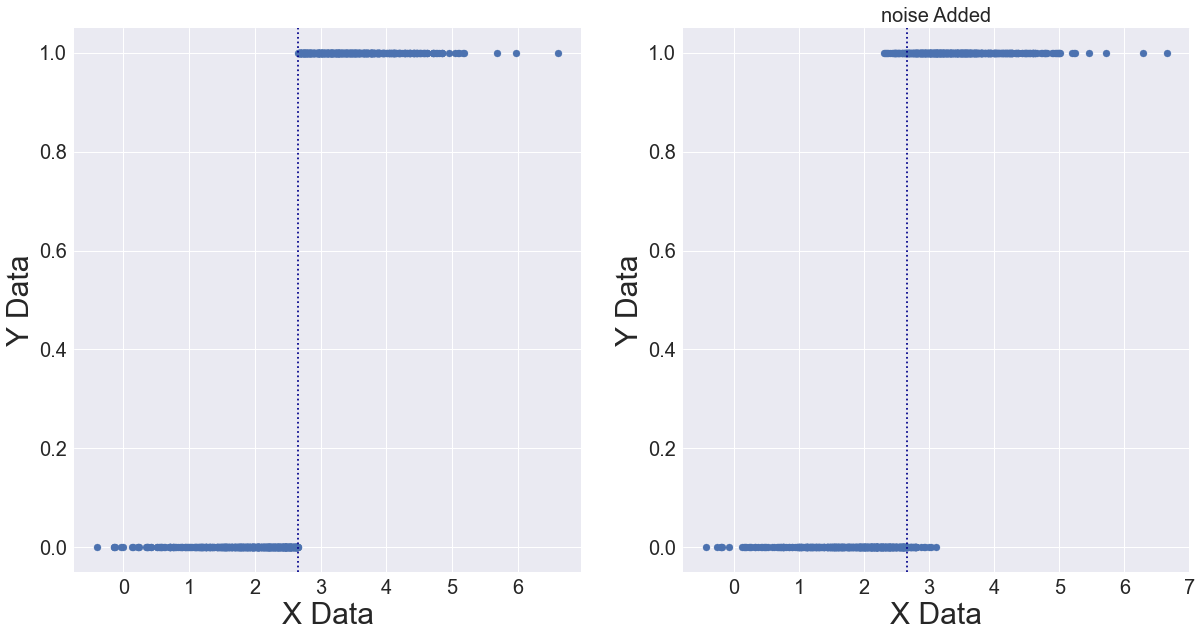

In [3]:
t_decision_boundary = -t_b/t_w    # target decision Boundary

# Generate Type1 
'''
x_data = np.random.randn(n_data, )         # randn, normal 모두 가우시안 정규분포, 사용 방법의 차이
y_data = x_data * t_w + t_b
y_data = 1/(1+np.exp(-y_data))
y_data = (y_data>0.5).astype(np.int)
'''

# Generate Type2
x_data = np.random.normal(t_decision_boundary, 1,(n_data, ))
y_data = (x_data > t_decision_boundary).astype(np.float32)
noise_added_x_data = x_data +  0.2 * np.random.normal(0, 1,(n_data, )) # Noise

# Visualize dataset
cmap = plt.get_cmap('rainbow', lut=n_data)
fig, axes = plt.subplots(1,2, figsize=(20, 10))
axes[0].scatter(x_data, y_data)
axes[0].set_xlabel('X Data', fontsize=30)
axes[0].set_ylabel('Y Data', fontsize=30)
axes[0].axvline(x=t_decision_boundary, color='darkblue', linestyle=':')
axes[0].tick_params(labelsize=20)

axes[1].scatter(noise_added_x_data, y_data)
axes[1].set_xlabel('X Data', fontsize=30)
axes[1].set_ylabel('Y Data', fontsize=30)
axes[1].tick_params(labelsize=20)
axes[1].axvline(x=t_decision_boundary, color='darkblue', linestyle=':')
axes[1].set_title('noise Added', fontsize=20)

## Learning 

- initial weight, bias 가 Target에 수렴되지 않고 발산하는 것을 확인


- Weight & Bias를 찾는 게 아니라 Boundary Decision을 찾는 게 Binary Classification의 목적
    * Step Fucntion에 가까워 지도록 혹은 적절한 분류를 위해 Weight의 절댓값을 키운다(Sigmoid Compress). But Boundary Condition에 영향
    * Boundary Condition(= -bias/weight)을 유지하기 위해 Bias도 증가 (증가하는 비율은 Boundary Condition의 위치)
    * 결국 학습의 대상은 Boundary Condition == Bias와 Weight의 비율


- Loss는 0으로 수렴시킬 수 없음, Sigmoid Activation function의 한계점


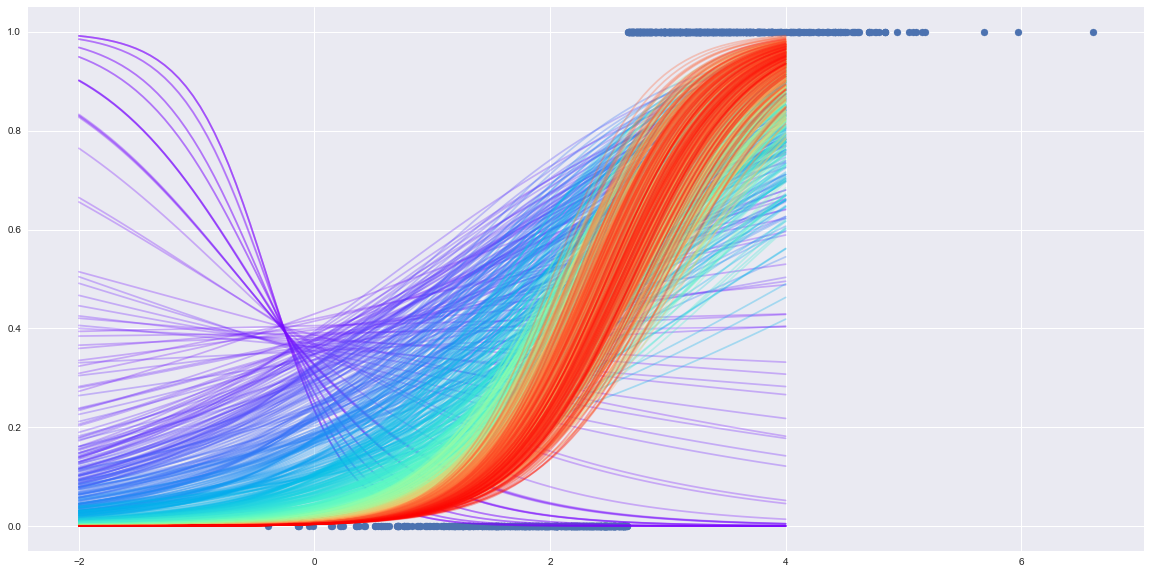

In [4]:
# set x range for visualization of model (Plot Sigmoid Graph each weight & bias )
x_range = np.linspace(-2, 4, 100)

# for Tracking Loss, Weight , Bias
J_track = list()
w_track, b_track = list(), list()

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x_data, y_data)              # DATA scatter

for data_idx, (x, y) in enumerate(zip(x_data, y_data)):
    w_track.append(w)
    b_track.append(b)
    
    # Visualize updated Sigmoid graph
    y_range = w*x_range + b
    y_range = 1/(1 + np.exp(-y_range))
    ax.plot(x_range, y_range, color=cmap(data_idx), alpha=0.3)
    
    # Loss Calculation
    pred = x*w + b
    pred = 1/(1 + np.exp(-pred))
    J = -(y*np.log(pred) + (1-y)*np.log(1-pred)) # Binary Cross Entropy Error
    J_track.append(J)
    
    # jacobians
    dJ_dpred = (pred - y)/(pred*(1-pred))        # diff of Binary Cross Entropy
    dpred_dz = pred*(1-pred)                     # diff of Sigmoid                 # 두 개 엮으면 더 간단해짐
    dz_dw = x                                    # Row Vertor
    dz_db = 1
    
    # backpropagation
    dJ_dz = dJ_dpred * dpred_dz
    
    dJ_dw = dJ_dz * dz_dw
    dJ_db = dJ_dz * dz_db
    
    # train model
    w = w - lr*dJ_dw
    b = b - lr*dJ_db

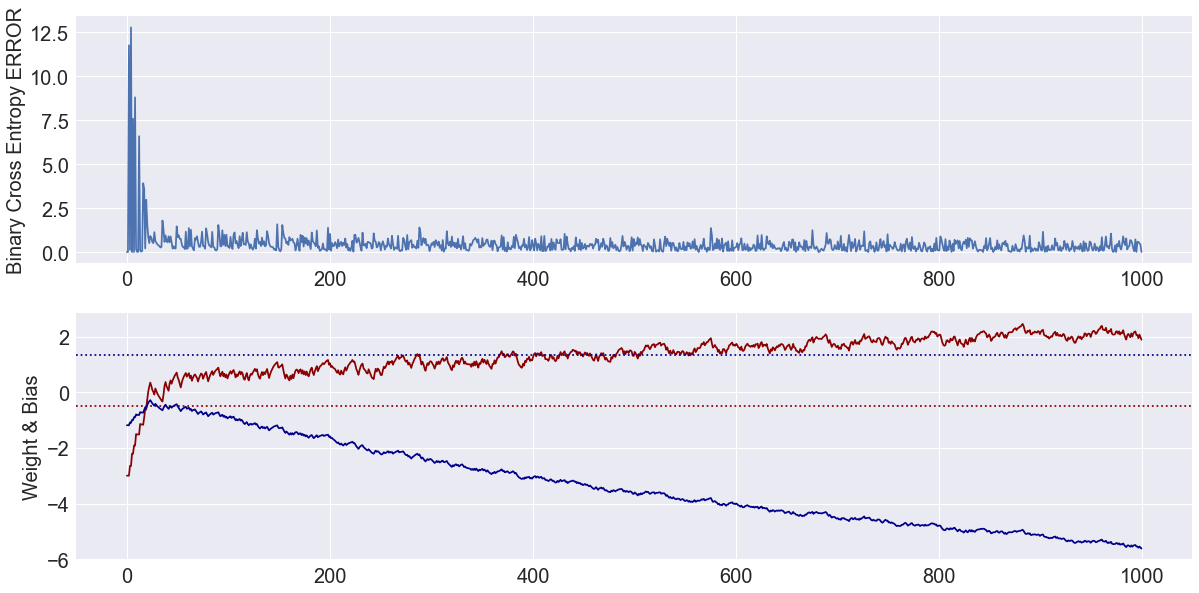

In [5]:
# Visualize Tracked Loss, Weight, Bias
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
axes[0].plot(J_track)
axes[0].set_ylabel('Binary Cross Entropy ERROR', fontsize=20)
axes[0].tick_params(labelsize=20)
axes[1].set_ylabel('Weight & Bias', fontsize=20)
axes[1].axhline(y=t_w, color='darkred', linestyle=':')
axes[1].plot(w_track, color='darkred')
axes[1].axhline(y=t_b, color='darkblue', linestyle=':')
axes[1].plot(b_track, color='darkblue')
axes[1].tick_params(labelsize=20)

## Tracking Decision Boundary

- 실질적 학습 대상

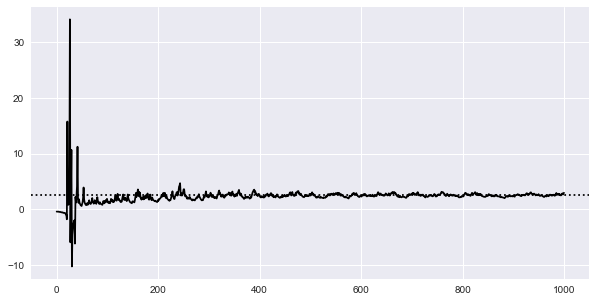

In [6]:
w_track = np.array(w_track)
b_track = np.array(b_track)

decision_track = -b_track/w_track
db = -t_b/t_w
fig,ax = plt.subplots(figsize=(10,5))
ax.axhline(y=db, color='black', linestyle=':')
ax.plot(decision_track, color='black')